In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import gc

# Preparing the dataset

In [2]:
train_set = pd.read_excel("Train_dataset.xlsx")
test_set = pd.read_excel("Test_dataset.xlsx")

In [3]:
train_set.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [4]:
test_set.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18


In [5]:
train_set.describe()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
count,7345.000000,7321.000000,7322.000000,7149.000000,7.115000e+03,6984.000000,7007.000000,7312.000000,7306.000000,7298.000000,7358.000000,7383.000000
mean,486.188167,24218.079195,54.746004,105.543623,1.041827e+07,5.436840,0.140654,0.038496,33.991103,0.944722,4.996782,569.522650
std,278.280638,19602.174448,25.865877,55.284466,5.689059e+06,1.655755,0.384544,0.013406,34.036816,0.202732,2.616719,423.896621
min,5.250000,3351.280000,10.010000,10.020000,5.291170e+05,2.560000,-0.430000,0.015200,1.000000,0.600000,0.450000,10.573482
25%,247.100000,11270.150000,32.722500,57.630000,5.577644e+06,4.020000,0.030000,0.026900,1.000000,0.770000,2.762500,223.516594
50%,488.380000,12765.840000,54.510000,105.770000,1.048238e+07,5.440000,0.110000,0.038400,17.700000,0.940000,5.020000,458.716483
75%,724.020000,38182.080000,77.397500,154.130000,1.529882e+07,6.870000,0.230000,0.050200,74.900000,1.120000,7.217500,827.927051
max,965.210000,55722.000000,99.980000,199.970000,2.015445e+07,8.330000,0.780000,0.061500,74.900000,1.290000,9.560000,1970.400563


In [6]:
test_set.describe()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
count,3319.000000,3060.000000,3056.000000,3039.000000,3.283000e+03,3301.000000,3300.000000,3205.000000,3188.000000,2902.000000,3193.000000
mean,488.572588,25099.383680,54.257196,104.731629,1.018308e+07,5.422872,0.139082,0.038340,33.459504,0.938828,5.002543
std,281.559056,19886.618464,26.184335,54.231743,5.645921e+06,1.669301,0.385717,0.013208,33.718657,0.201421,2.617696
min,5.490000,3351.280000,10.100000,10.050000,5.244620e+05,2.560000,-0.430000,0.015200,1.000000,0.600000,0.450000
25%,241.245000,11270.150000,31.100000,59.050000,5.282625e+06,3.990000,0.030000,0.027000,1.000000,0.762500,2.700000
50%,488.410000,12765.840000,54.170000,104.550000,1.019403e+07,5.430000,0.110000,0.038600,17.700000,0.930000,4.990000
75%,739.465000,38182.080000,77.002500,151.110000,1.507125e+07,6.850000,0.230000,0.049900,74.900000,1.110000,7.230000
max,965.080000,55722.000000,99.960000,199.970000,2.013252e+07,8.330000,0.780000,0.061500,74.900000,1.290000,9.560000


In [7]:
# printing the shape of each of the dataset
print(train_set.shape, test_set.shape)

(7383, 15) (3331, 14)


### lets combine both set and analyse each feature variable

In [8]:
data_set = pd.concat([train_set.drop(labels=["Stock Price"],  axis=1), test_set])
data_set = data_set.reset_index(drop=True)

In [9]:
data_set.describe()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
count,10664.000000,10381.000000,10378.000000,10188.000000,1.039800e+04,10285.000000,10307.000000,10517.000000,10494.000000,10200.000000,10551.000000
mean,486.930280,24477.860693,54.602065,105.301411,1.034401e+07,5.432357,0.140150,0.038448,33.829607,0.943045,4.998525
std,279.294087,19689.588363,25.959752,54.971155,5.676256e+06,1.660047,0.384902,0.013345,33.939752,0.202368,2.616892
min,5.250000,3351.280000,10.010000,10.020000,5.244620e+05,2.560000,-0.430000,0.015200,1.000000,0.600000,0.450000
25%,244.630000,11270.150000,32.275000,57.900000,5.486451e+06,4.010000,0.030000,0.027000,1.000000,0.770000,2.750000
50%,488.395000,12765.840000,54.460000,105.335000,1.038880e+07,5.440000,0.110000,0.038500,17.700000,0.940000,5.010000
75%,727.707500,38182.080000,77.317500,153.070000,1.521699e+07,6.860000,0.230000,0.050100,74.900000,1.120000,7.220000
max,965.210000,55722.000000,99.980000,199.970000,2.015445e+07,8.330000,0.780000,0.061500,74.900000,1.290000,9.560000


In [10]:
data_set.set_index('Stock Index', inplace=True)

In [11]:
# shape of the data set is
data_set.shape

(10714, 13)

In [12]:
# getting list of categorical variables
categ = (data_set.dtypes == "object")
categ_cols = list(categ[categ].index)
categ_cols.extend(['General Index', 'Covid Impact (Beta)', 'Dollar Exchange Rate'])
categ_cols

['Index',
 'Industry',
 'General Index',
 'Covid Impact (Beta)',
 'Dollar Exchange Rate']

In [13]:
# getting list of numerical variables
num_cols = [val for val in data_set.columns.tolist() if val not in categ_cols]
num_cols

['VWAP',
 'NAV',
 'P/E Ratio',
 'Volumes Traded',
 'Inventory Turnover',
 'Tracking Error',
 'Put-Call Ratio',
 'P/B Ratio']

In [14]:
# find the number of unique items for categorical features
unique_items = {}
for col in categ_cols:
    unique_items[col] = data_set[col].unique(), data_set[col].nunique()

In [15]:
unique_items

{'Index': (array(['NYSE', 'BSE', 'S&P 500', 'NSE', 'JSE'], dtype=object), 5),
 'Industry': (array(['Real Estate', 'Information Tech', 'Materials', 'Healthcare',
         'Energy'], dtype=object),
  5),
 'General Index': (array([12765.84, 38182.08,  3351.28, 11270.15, 55722.  ,      nan]),
  5),
 'Covid Impact (Beta)': (array([-0.43,  0.23,  0.03,  0.78,  0.11,   nan]), 5),
 'Dollar Exchange Rate': (array([ 1. , 74.9,  nan, 17.7]), 3)}

In [16]:
# check for missing columns
# for categ_col
missing_categ_col = {}
for col in categ_cols:
    missing_categ_col[col] = data_set[col].isnull().sum()
# for num_col
missing_num_col = {}
for col in num_cols:
    missing_num_col[col] = data_set[col].isnull().sum()
print(missing_categ_col, missing_num_col)

{'Index': 0, 'Industry': 0, 'General Index': 333, 'Covid Impact (Beta)': 407, 'Dollar Exchange Rate': 220} {'VWAP': 50, 'NAV': 336, 'P/E Ratio': 526, 'Volumes Traded': 316, 'Inventory Turnover': 429, 'Tracking Error': 197, 'Put-Call Ratio': 514, 'P/B Ratio': 163}


## Visualizing the data to check for outliers and other trends

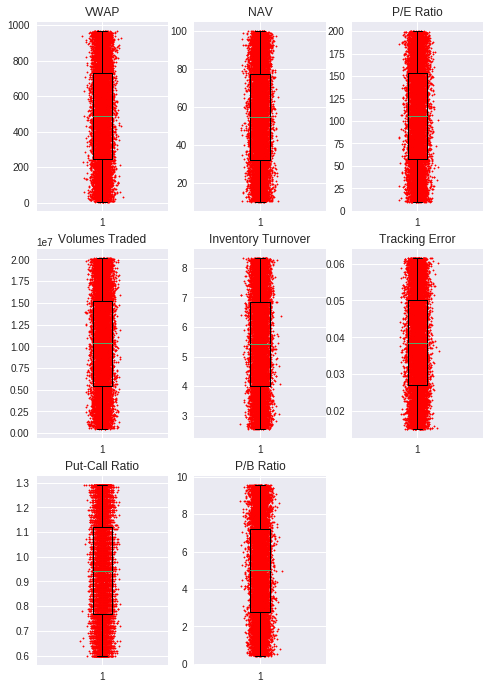

In [17]:
i =1
plt.figure(figsize=(8,16))
for col in num_cols:
    strip_data = data_set[col].dropna()
    plt.subplot(4,3, i)
    plt.boxplot(strip_data)
    x = np.random.normal(1, 0.04, len(strip_data))
    plt.scatter(x, strip_data, marker='o', s=2, c='r')
    plt.title(col)
    i+=1
plt.show()


#### based on the above boxplots General index, covid impact and Dolar exchange rates are categorical, which I have rectified by extending the category list
#### Also the distribution is symmetric uniform, which tells us that median and mean are about the same, no mode and no evident outliers

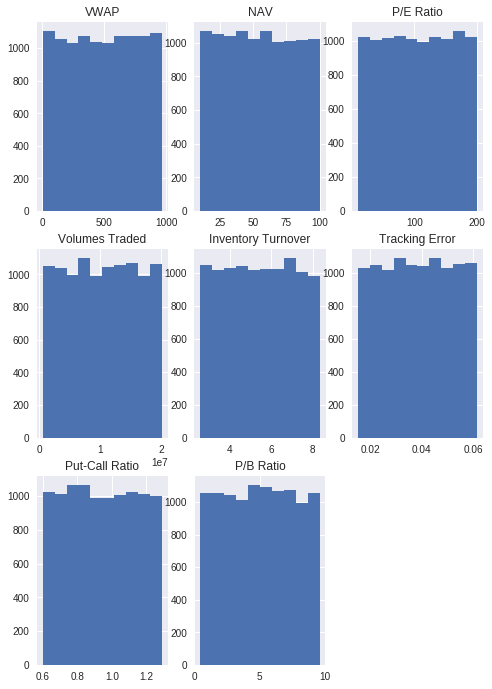

In [18]:
# now visualizing as histogram
i = 1
plt.figure(figsize=(8,16))
for col in num_cols:
    strip_data = data_set[col].dropna()
    plt.subplot(4,3,i); plt.hist(strip_data)
    plt.title(col)
    i+=1
plt.show()

# Developing the pipeline
#### here the description shall follow

In [19]:
# lets fill general index and dollar exchange rate
for row in data_set[data_set['General Index'].isnull()].itertuples():
    if row[1]== 'BSE':
        data_set.at[row[0], 'General Index'] = 38182.08
    elif row[1] == 'JSE':
        data_set.at[row[0], 'General Index'] = 55722
    elif row[1] == 'NSE':
        data_set.at[row[0], 'General Index'] = 11270.15
    elif row[1] == 'NYSE':
        data_set.at[row[0], 'General Index'] = 12765.84
    else:
        data_set.at[row[0], 'General Index'] = 3351.28
        
for row in data_set[data_set['Dollar Exchange Rate'].isnull()].itertuples():
    if row[1]== 'BSE':
        data_set.at[row[0], 'Dollar Exchange Rate'] = 74.9
    elif row[1] == 'JSE':
        data_set.at[row[0], 'Dollar Exchange Rate'] = 17.7
    elif row[1] == 'NSE':
        data_set.at[row[0], 'Dollar Exchange Rate'] = 74.9
    elif row[1] == 'NYSE':
        data_set.at[row[0], 'Dollar Exchange Rate'] = 1
    else:
        data_set.at[row[0], 'Dollar Exchange Rate'] = 1

In [20]:
# we delete the index
data_set = data_set.drop(labels = ['Index'], axis=1)
del categ_cols[categ_cols.index('Index')]

In [21]:
# lets fill covid impact(beta)
for row in data_set[data_set['Covid Impact (Beta)'].isnull()].itertuples():
    if row[1]== 'Energy':
        data_set.at[row[0], 'Covid Impact (Beta)'] = 0.11
    elif row[1] == 'Healthcare':
        data_set.at[row[0], 'Covid Impact (Beta)'] = 0.78
    elif row[1] == 'Information Tech':
        data_set.at[row[0], 'Covid Impact (Beta)'] = 0.23
    elif row[1] == 'Materials':
        data_set.at[row[0], 'Covid Impact (Beta)'] = 0.03
    else:
        data_set.at[row[0], 'Covid Impact (Beta)'] = 0.43

#### next we impute the remaining features

In [22]:
num_cols = ['VWAP', 'General Index', 'NAV', 'P/E Ratio', 'Volumes Traded', 'Inventory Turnover', 'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate', 'Put-Call Ratio', 'P/B Ratio']
categ_cols = ['Industry']

In [23]:
# we employ mean imputation method for all
mean_imputer = SimpleImputer()
imputed_num_data = pd.DataFrame(mean_imputer.fit_transform(data_set[num_cols]))
imputed_num_data.columns = num_cols

In [24]:
# One hot encoding the categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cat_data = pd.DataFrame(OH_encoder.fit_transform(data_set[categ_cols]))
OH_cat_data.columns = ['Energy', 'Healthcare', 'Infromation Tech', 'Materials', 'Real Estate']

In [25]:
# concat the two data
data_join = pd.concat([OH_cat_data, imputed_num_data], axis=1)
data_join['Stock Index'] = data_set.index
data_join.set_index('Stock Index', inplace=True)

In [26]:
# deleting all unusable data structures and calling garbage collector
del num_cols; del categ_cols; del data_set; del OH_encoder; del mean_imputer
del imputed_num_data; del OH_cat_data; del missing_categ_col; del missing_num_col; del unique_items
gc.collect()

47629

# Preparing the training and test set

In [27]:
X_train = data_join[:7383].reset_index(drop=True)
X_test = data_join[7383:].reset_index(drop=True)
y = train_set['Stock Price']

In [28]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size=0.33, random_state=0)

# Training our model

In [29]:
ts = time.time()

model = XGBRegressor(
    max_depth=7,
    min_child_weight=100,
    n_estimators=1000,
    subsample=0.9,
    eta=0.05,
)

model.fit(
    X_train, y_train,
    eval_metric="rmse",
    eval_set = [(X_train, y_train), (X_valid, y_valid)],
    verbose=True,
    early_stopping_rounds=20
)

time.time() - ts

[0]	validation_0-rmse:669.04108	validation_1-rmse:687.08240
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:636.51752	validation_1-rmse:653.61371
[2]	validation_0-rmse:605.65008	validation_1-rmse:621.78229
[3]	validation_0-rmse:576.32892	validation_1-rmse:591.60120
[4]	validation_0-rmse:548.52472	validation_1-rmse:563.14740
[5]	validation_0-rmse:522.07062	validation_1-rmse:535.89740
[6]	validation_0-rmse:497.00388	validation_1-rmse:510.11655
[7]	validation_0-rmse:473.10642	validation_1-rmse:485.43033
[8]	validation_0-rmse:450.39041	validation_1-rmse:462.17401
[9]	validation_0-rmse:428.82382	validation_1-rmse:440.03827
[10]	validation_0-rmse:408.38788	validation_1-rmse:419.11612
[11]	validation_0-rmse:388.99066	validation_1-rmse:399.25565
[12]	validation_0-rmse:370.54364	validation_1-rmse:380.49570
[13]	validation_0-rmse:353.01968	validation_1-rmse:362.602

[135]	validation_0-rmse:62.93063	validation_1-rmse:73.35983
[136]	validation_0-rmse:62.90324	validation_1-rmse:73.34754
[137]	validation_0-rmse:62.86229	validation_1-rmse:73.35808
[138]	validation_0-rmse:62.82146	validation_1-rmse:73.36251
[139]	validation_0-rmse:62.79106	validation_1-rmse:73.37739
[140]	validation_0-rmse:62.75959	validation_1-rmse:73.39295
[141]	validation_0-rmse:62.70011	validation_1-rmse:73.38236
[142]	validation_0-rmse:62.67300	validation_1-rmse:73.37992
[143]	validation_0-rmse:62.62783	validation_1-rmse:73.39786
[144]	validation_0-rmse:62.60066	validation_1-rmse:73.41067
[145]	validation_0-rmse:62.52661	validation_1-rmse:73.43308
[146]	validation_0-rmse:62.49354	validation_1-rmse:73.46624
[147]	validation_0-rmse:62.45411	validation_1-rmse:73.46330
[148]	validation_0-rmse:62.43286	validation_1-rmse:73.47411
[149]	validation_0-rmse:62.38311	validation_1-rmse:73.46784
[150]	validation_0-rmse:62.36147	validation_1-rmse:73.45393
[151]	validation_0-rmse:62.34549	validat

1.683725118637085

In [30]:
# saving the model for use in part B
model.save_model('HackPrice.model')

In [31]:
# plot features importance function
def plot_feat_importance(booster, figsize):
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster = booster, ax=ax)

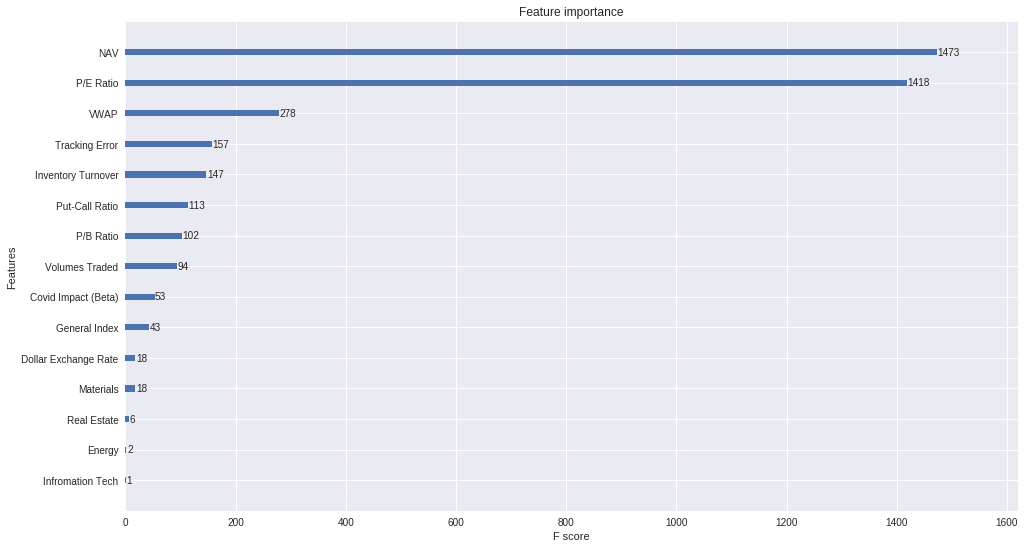

In [32]:
# plotting the feature importance
plot_feat_importance(model, (16,9))
plt.show()

# Generating Submission

In [33]:
# saving X_test for use in second submission result
X_test.to_csv("Test_data_A", index=False)

In [34]:
y_test = model.predict(X_test)

In [35]:
submission = pd.DataFrame()
submission['Stock Index'] = test_set['Stock Index']
submission['Stock Price'] = y_test

In [36]:
submission.head()

,Stock Index,Stock Price
0,AC3235,813.395203
1,AC3236,260.240417
2,AC3237,1576.299683
3,AC3238,872.839478
4,AC3239,273.409180


In [37]:
# saving into submission1.csv
submission.to_csv("submission1.csv", index=False)

In [38]:
X_test.head(10)

,Energy,Healthcare,Infromation Tech,Materials,Real Estate,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,0.0,0.0,0.0,1.0,0.0,53.30000,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.800000,4.66
1,1.0,0.0,0.0,0.0,0.0,749.34000,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.860000,6.11
2,0.0,0.0,1.0,0.0,0.0,567.75000,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.930000,4.99
3,0.0,1.0,0.0,0.0,0.0,646.78000,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.090000,1.26
4,0.0,0.0,0.0,1.0,0.0,380.33000,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,0.943045,6.18
5,0.0,1.0,0.0,0.0,0.0,301.09000,11270.15,25.27,149.36,9878930.0,8.17,0.78,0.0233,74.9,0.943045,1.12
6,0.0,0.0,0.0,1.0,0.0,227.28000,38182.08,38.50,193.01,4934899.0,4.91,0.03,0.0265,74.9,1.230000,4.60
7,0.0,0.0,0.0,0.0,1.0,486.93028,3351.28,73.40,121.63,4070029.0,6.11,-0.43,0.0504,1.0,1.000000,4.72
8,1.0,0.0,0.0,0.0,0.0,486.93028,11270.15,54.33,169.47,13609149.0,4.93,0.11,0.0609,74.9,1.000000,3.96
9,0.0,1.0,0.0,0.0,0.0,727.98000,11270.15,99.59,139.23,12499327.0,4.65,0.78,0.0206,74.9,1.070000,2.58
